In [2]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import matplotlib
import seaborn as sns

data_dir = "D:/DATA/ClockV2/histories"

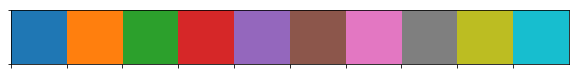

In [3]:
matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams["font.size"] = 26

cp = sns.color_palette()
sns.palplot(cp)
plt.show()

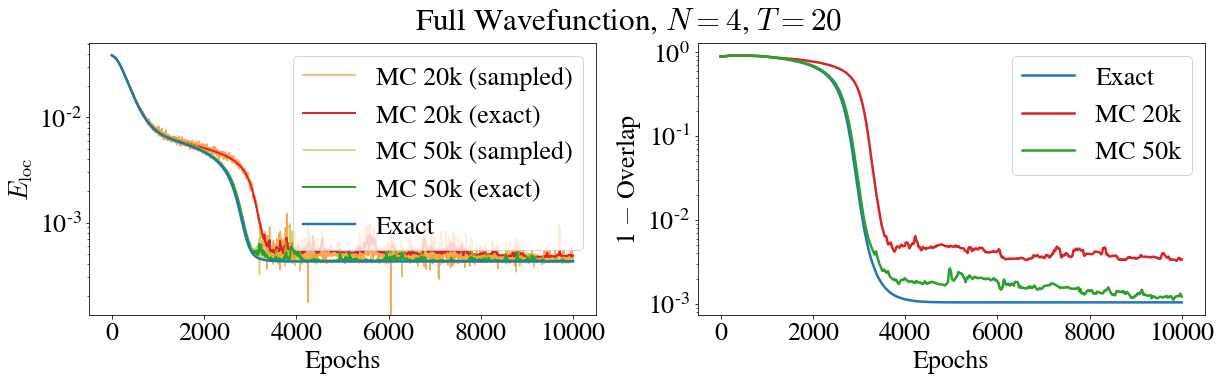

In [4]:
machine_type = "fullwv"
title_type = "Full Wavefunction"
n_sites = 4
time_steps = 20

all_states = h5py.File("{}/N={}/allstates_{}_N{}M{}.h5py".format(data_dir, n_sites, machine_type, n_sites, time_steps), "r")
sampling1 = h5py.File("{}/N={}/sampling{}_{}_N{}M{}.h5py".format(data_dir, n_sites, 20000, machine_type, n_sites, time_steps), "r")
sampling2 = h5py.File("{}/N={}/sampling{}_{}_N{}M{}.h5py".format(data_dir, n_sites, 50000, machine_type, n_sites, time_steps), "r")

plt.figure(figsize=(20, 5))
plt.suptitle("{}, $N={}$, $T={}$".format(title_type, n_sites, time_steps))

plt.subplot(121)
plt.semilogy(sampling1["sampled_Eloc"][:].real, label="MC 20k (sampled)", color=cp[1], alpha=0.7)
plt.semilogy(sampling1["exact_Eloc"][:].real, label="MC 20k (exact)", color=cp[3], linewidth=2.0)
plt.semilogy(sampling2["sampled_Eloc"][:].real, label="MC 50k (sampled)", color=cp[8], alpha=0.7)
plt.semilogy(sampling2["exact_Eloc"][:].real, label="MC 50k (exact)", color=cp[2], linewidth=2.0)
plt.semilogy(all_states["exact_Eloc"][:].real, label="Exact", color=cp[0], linewidth=2.4)
plt.xlabel("Epochs")
plt.ylabel("$E_\mathrm{loc}$")
plt.legend()

plt.subplot(122)
plt.semilogy(1 - all_states["overlaps"][:], label="Exact", linewidth=2.5, color=cp[0])
plt.semilogy(1 - sampling1["overlaps"][:], label="MC 20k", linewidth=2.5, color=cp[3])
plt.semilogy(1 - sampling2["overlaps"][:], label="MC 50k", linewidth=2.5, color=cp[2])
plt.xlabel("Epochs")
plt.ylabel("1 $-$ Overlap")
plt.legend()

plt.show()
#plt.savefig("history_{}_N{}M{}.pdf".format(machine_type, n_sites, time_steps), bbox_inches='tight')


all_states.close()
sampling1.close()
sampling2.close()

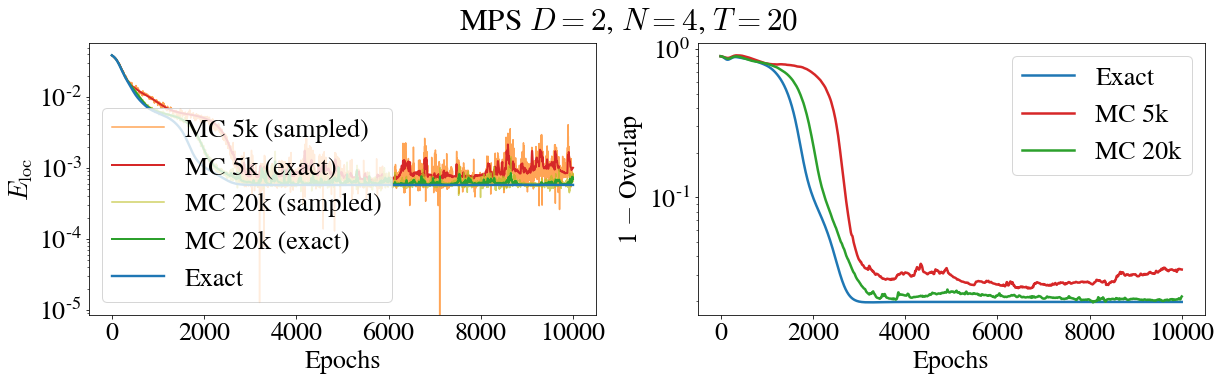

In [44]:
machine_type = "mpsD2"
title_type = "MPS $D=2$"
n_sites = 4
time_steps = 20

all_states = h5py.File("histories/N={}/allstates_{}_N{}M{}.h5py".format(n_sites, machine_type, n_sites, time_steps), "r")
sampling1 = h5py.File("histories/N={}/sampling{}_{}_N{}M{}.h5py".format(n_sites, 5000, machine_type, n_sites, time_steps), "r")
sampling2 = h5py.File("histories/N={}/sampling{}_{}_N{}M{}.h5py".format(n_sites, 20000, machine_type, n_sites, time_steps), "r")

plt.figure(figsize=(20, 5))
plt.suptitle("{}, $N={}$, $T={}$".format(title_type, n_sites, time_steps))

plt.subplot(121)
plt.semilogy(sampling1["sampled_Eloc"][:].real, label="MC 5k (sampled)", color=cp[1], alpha=0.7)
plt.semilogy(sampling1["exact_Eloc"][:].real, label="MC 5k (exact)", color=cp[3], linewidth=2.0)
plt.semilogy(sampling2["sampled_Eloc"][:].real, label="MC 20k (sampled)", color=cp[8], alpha=0.7)
plt.semilogy(sampling2["exact_Eloc"][:].real, label="MC 20k (exact)", color=cp[2], linewidth=2.0)
plt.semilogy(all_states["exact_Eloc"][:].real, label="Exact", color=cp[0], linewidth=2.4)
plt.xlabel("Epochs")
plt.ylabel("$E_\mathrm{loc}$")
plt.legend()

plt.subplot(122)
plt.semilogy(1 - all_states["overlaps"][:], label="Exact", linewidth=2.5, color=cp[0])
plt.semilogy(1 - sampling1["overlaps"][:], label="MC 5k", linewidth=2.5, color=cp[3])
plt.semilogy(1 - sampling2["overlaps"][:], label="MC 20k", linewidth=2.5, color=cp[2])
plt.xlabel("Epochs")
plt.ylabel("1 $-$ Overlap")
plt.legend()

plt.show()
#plt.savefig("history_{}_N{}M{}.pdf".format(machine_type, n_sites, time_steps), bbox_inches='tight')

all_states.close()
sampling1.close()
sampling2.close()

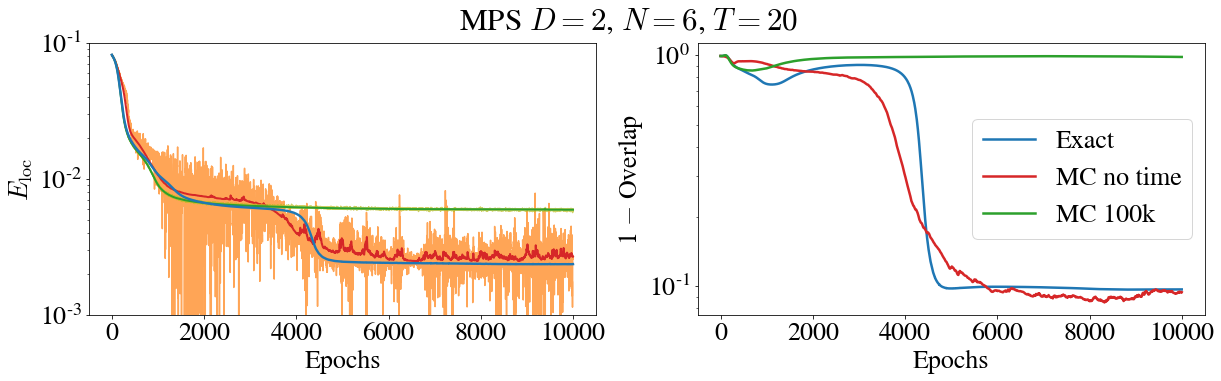

In [39]:
machine_type = "mpsD2"
title_type = "MPS $D=2$"
n_sites = 6
time_steps = 20

all_states = h5py.File("histories/N={}/allstates_{}_N{}M{}.h5py".format(n_sites, machine_type, n_sites, time_steps), "r")
sampling1 = h5py.File("histories/N={}/spacesampling{}_{}_N{}M{}.h5py".format(n_sites, 1000, machine_type, n_sites, time_steps), "r")
sampling2 = h5py.File("histories/N={}/sampling{}_{}_N{}M{}.h5py".format(n_sites, 100000, machine_type, n_sites, time_steps), "r")

plt.figure(figsize=(20, 5))
plt.suptitle("{}, $N={}$, $T={}$".format(title_type, n_sites, time_steps))

plt.subplot(121)
plt.semilogy(sampling1["sampled_Eloc"][:].real, label="MC no time (sampled)", color=cp[1], alpha=0.7)
plt.semilogy(sampling1["exact_Eloc"][:].real, label="MC no time (exact)", color=cp[3], linewidth=2.0)
plt.semilogy(sampling2["sampled_Eloc"][:].real, label="MC 100k (sampled)", color=cp[8], alpha=0.7)
plt.semilogy(sampling2["exact_Eloc"][:].real, label="MC 100k (exact)", color=cp[2], linewidth=2.0)
plt.semilogy(all_states["exact_Eloc"][:].real, label="Exact", color=cp[0], linewidth=2.4)
plt.xlabel("Epochs")
plt.ylabel("$E_\mathrm{loc}$")
plt.ylim([1e-3, 1e-1])
#plt.legend()

plt.subplot(122)
plt.semilogy(1 - all_states["overlaps"][:], label="Exact", linewidth=2.5, color=cp[0])
plt.semilogy(1 - sampling1["overlaps"][:], label="MC no time", linewidth=2.5, color=cp[3])
plt.semilogy(1 - sampling2["overlaps"][:], label="MC 100k", linewidth=2.5, color=cp[2])
plt.xlabel("Epochs")
plt.ylabel("1 $-$ Overlap")
plt.legend()

plt.show()
#plt.savefig("history_{}_N{}M{}.pdf".format(machine_type, n_sites, time_steps), bbox_inches='tight')

all_states.close()
sampling1.close()
sampling2.close()

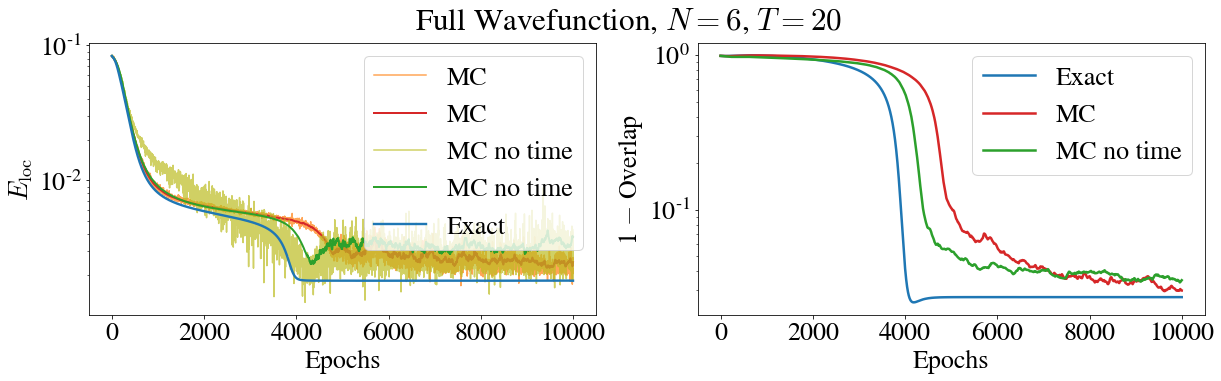

In [30]:
machine_type = "fullwv"
title_type = "Full Wavefunction"
n_sites = 6
time_steps = 20

all_states = h5py.File("histories/N={}/allstates_{}_N{}M{}.h5py".format(n_sites, machine_type, n_sites, time_steps), "r")
sampling1 = h5py.File("histories/N={}/sampling{}_{}_N{}M{}.h5py".format(n_sites, 20000, machine_type, n_sites, time_steps), "r")
sampling2 = h5py.File("histories/N={}/spacesampling{}_{}_N{}M{}.h5py".format(n_sites, 1000, machine_type, n_sites, time_steps), "r")

plt.figure(figsize=(20, 5))
plt.suptitle("{}, $N={}$, $T={}$".format(title_type, n_sites, time_steps))

plt.subplot(121)
plt.semilogy(sampling1["sampled_Eloc"][:].real, label="MC", color=cp[1], alpha=0.7)
plt.semilogy(sampling1["exact_Eloc"][:].real, label="MC", color=cp[3], linewidth=2.0)
plt.semilogy(sampling2["sampled_Eloc"][:].real, label="MC no time", color=cp[8], alpha=0.7)
plt.semilogy(sampling2["exact_Eloc"][:].real, label="MC no time", color=cp[2], linewidth=2.0)
plt.semilogy(all_states["exact_Eloc"][:].real, label="Exact", color=cp[0], linewidth=2.4)
plt.xlabel("Epochs")
plt.ylabel("$E_\mathrm{loc}$")
plt.legend()

plt.subplot(122)
plt.semilogy(1 - all_states["overlaps"][:], label="Exact", linewidth=2.5, color=cp[0])
plt.semilogy(1 - sampling1["overlaps"][:], label="MC", linewidth=2.5, color=cp[3])
plt.semilogy(1 - sampling2["overlaps"][:], label="MC no time", linewidth=2.5, color=cp[2])
plt.xlabel("Epochs")
plt.ylabel("1 $-$ Overlap")
plt.legend()

plt.show()
#plt.savefig("history_{}_N{}M{}.pdf".format(machine_type, n_sites, time_steps), bbox_inches='tight')

all_states.close()
sampling1.close()
sampling2.close()

C:\Users\SU\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


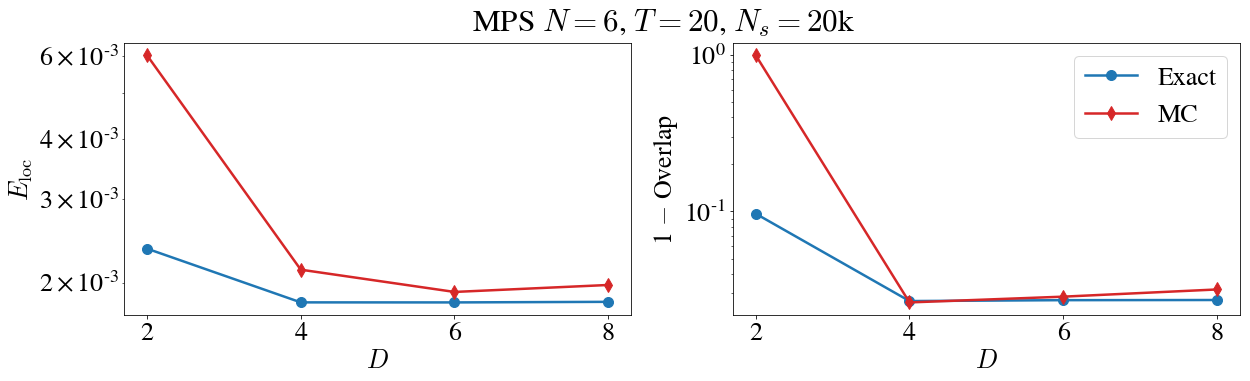

In [47]:
D_list = [2, 4, 6, 8]
all_states, sampling = [], []
for D in D_list:
    all_states.append(h5py.File("histories/N=6/allstates_mpsD{}_N6M20.h5py".format(D), "r"))
    sampling.append(h5py.File("histories/N=6/sampling20000_mpsD{}_N6M20.h5py".format(D), "r"))

all_states_overlap = np.array([x["overlaps"][:][-1] for x in all_states])
all_states_Eloc = np.array([x["exact_Eloc"][:][-1] for x in all_states])
sampling_overlap = np.array([x["overlaps"][:][-1] for x in sampling])
sampling_Eloc = np.array([x["exact_Eloc"][:][-1] for x in sampling])

plt.figure(figsize=(20, 5))
plt.suptitle("MPS $N=6$, $T=20$, $N_s=20$k")

plt.subplot(121)
plt.semilogy(D_list, all_states_Eloc, color=cp[0], marker="o", markersize=10, linewidth=2.5)
plt.semilogy(D_list, sampling_Eloc, color=cp[3], marker="d", markersize=10, linewidth=2.5)
plt.xlabel("$D$")
plt.ylabel("$E_\mathrm{loc}$")

plt.subplot(122)
plt.semilogy(D_list, 1 - all_states_overlap, color=cp[0], marker="o", markersize=10, label="Exact", linewidth=2.5)
plt.semilogy(D_list, 1 - sampling_overlap, color=cp[3], marker="d", markersize=10, label="MC", linewidth=2.5)
plt.xlabel("$D$")
plt.ylabel("1 $-$ Overlap")
plt.legend()

plt.show()

for x, y in zip(all_states, sampling):
    x.close()
    y.close()
#plt.savefig("mps_vs_bond_dim_N6M20.pdf", bbox_inches='tight')

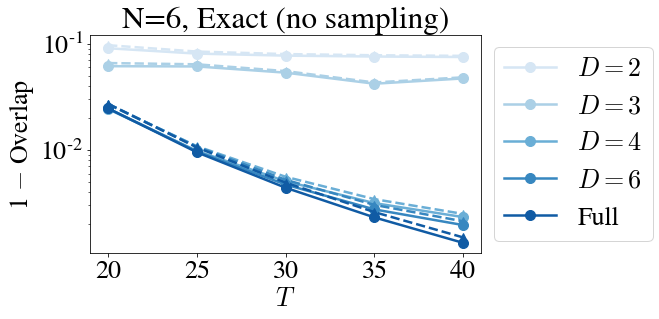

In [6]:
T_list = [20, 25, 30, 35, 40]
D_list = [2, 3, 4, 6]

full = []
mps = [[] for D in D_list]

for T in T_list:
    full.append(h5py.File("histories/N=6/allstates_fullwv_N6M{}.h5py".format(T), "r"))
    for i, D in enumerate(D_list):
        mps[i].append(h5py.File("histories/N=6/allstates_mpsD{}_N6M{}.h5py".format(D, T), "r"))

overlaps = {}
avg_overlaps = {}
for i, D in enumerate(D_list):
    overlaps["$D={}$".format(D)] = np.array([x["overlaps"][:][-1] for x in mps[i]])
    avg_overlaps["$D={}$".format(D)] = np.array([x["avg_overlaps"][:][-1] for x in mps[i]])
overlaps["Full"] = np.array([x["overlaps"][:][-1] for x in full])
avg_overlaps["Full"] = np.array([x["avg_overlaps"][:][-1] for x in full])
    
for x in full:
    x.close()
for x in mps:
    for y in x:
        y.close()

cseq = sns.color_palette("Blues", len(D_list) + 1)

plt.figure(figsize=(7, 4))
plt.title("N=6, Exact (no sampling)")
for i, k in enumerate(overlaps.keys()):
    plt.semilogy(T_list, 1 - overlaps[k], linestyle="--", color=cseq[i], linewidth=2.5, marker="^", markersize=8)
    plt.semilogy(T_list, 1 - avg_overlaps[k], color=cseq[i], linewidth=2.5, marker="o", markersize=10, label=k)
plt.xlabel("$T$")
plt.ylabel("1 $-$ Overlap")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig("overlap-vs-time-steps.pdf", bbox_inches='tight')

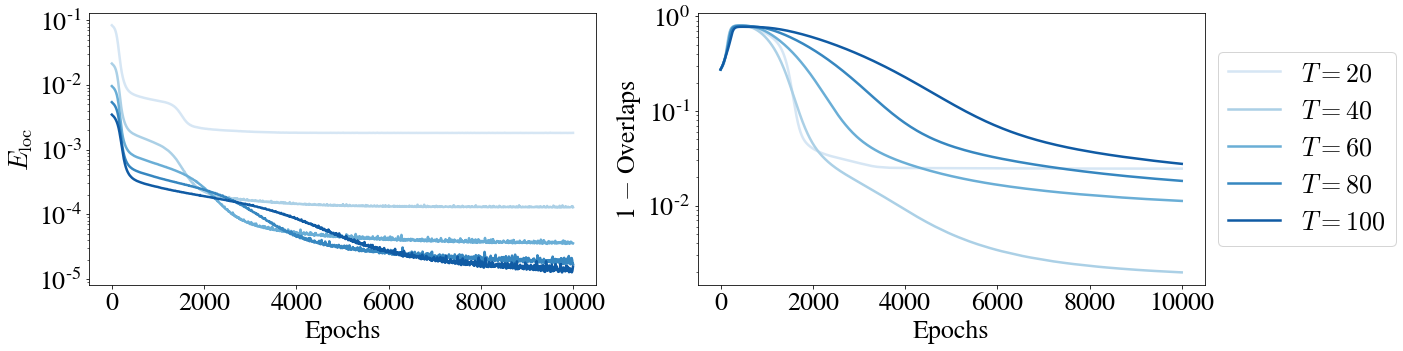

In [26]:
D = 6
T_list = [20, 40, 60, 80, 100]
mps = [h5py.File("histories/N=6/allstates_mpsD{}_N6M{}.h5py".format(D, T), "r") for T in T_list]

cseq = sns.color_palette("Blues", len(T_list))

plt.figure(figsize=(20, 5))
plt.subplot(121)
for i, T in enumerate(T_list):
    plt.semilogy(mps[i]["exact_Eloc"][:].real, color=cseq[i], label="$T={}$".format(T), linewidth=2.5)
plt.xlabel("Epochs")
plt.ylabel("$E_\mathrm{loc}$")

plt.subplot(122)
for i, T in enumerate(T_list):
    plt.semilogy(1 - mps[i]["avg_overlaps"][:], color=cseq[i], label="$T={}$".format(T), linewidth=2.5)
plt.xlabel("Epochs")
plt.ylabel("1 $-$ Overlaps")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

for x in mps:
    x.close()